# PROYECTO INTEGRADOR CURSO DATA ANALITYCS :  **ENFERMEDADES CARDIACAS**




In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv > heart.csv
    else:
        !wget heart.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv

--2022-08-22 16:03:10--  http://heart.csv/
Resolving heart.csv (heart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘heart.csv’
--2022-08-22 16:03:10--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-08-22 16:03:10 (65.9 MB/s) - ‘heart.csv’ saved [11323/11323]

FINISHED --2022-08-22 16:03:10--
Total wall clock time: 0.3s
Downloaded: 1 files, 11K in 0s (65.9 MB/s)


In [ ]:
df = pd.read_csv("heart.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#VEO EL TEMAÑO DEL DATASET

df.shape

(303, 14)

In [ ]:
#VER COMO ESTA BALANCEADO EL DATASET.

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

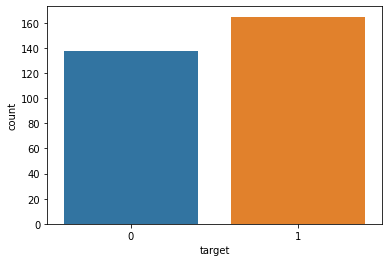

In [ ]:
ax = sns.countplot(data=df, x= 'target')

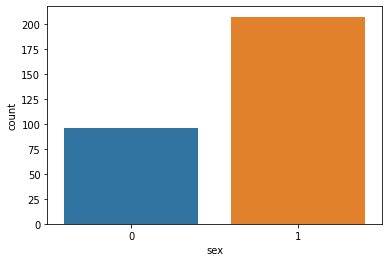

In [ ]:
#VER COMO ESTA BALANCEADO EL DATASET EN CUANTO A GENERO. 
ax = sns.countplot(data=df, x='sex')

In [ ]:
#VER COMO ESTA BALANCEADO EL DATASET EN CUANTO A EDAD.
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [ ]:
df_target = df.copy()

In [ ]:
df_target['target'] = df.apply(lambda x: 'POSIBLE ENFERMEDAD CARDIACA' if x.target == 1 else 'SIN ENFERMEDAD CARDIACA', axis=1)

In [ ]:
df_target['target'].value_counts()

POSIBLE ENFERMEDAD CARDIACA    165
SIN ENFERMEDAD CARDIACA        138
Name: target, dtype: int64

In [ ]:
#ME FIJO COMO QUEDO EL DATASET CON EL CAMBIO DE NOMBRE DE LA COLUMNA 'TARGET'
df_target.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,POSIBLE ENFERMEDAD CARDIACA
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,POSIBLE ENFERMEDAD CARDIACA
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,POSIBLE ENFERMEDAD CARDIACA
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,POSIBLE ENFERMEDAD CARDIACA
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,POSIBLE ENFERMEDAD CARDIACA


In [ ]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
class RandomBaseModel():
    def __init__(self):
        self.classes_ = [0, 1]
    def fit(self,X, y):
        self.classes_ = np.unique(y)
        return None

    def predict(self,X):
        rand = np.random.randint(0, len(self.classes_), size=X.shape[0])
        rand_clases = [self.classes_[x] for x in rand]
        return np.asarray(rand_clases)

In [ ]:
random_model = RandomBaseModel()
random_model.fit(X_train, y_train)
y_hat_base = random_model.predict(X_test)
random_model.classes_

array([0, 1])

In [ ]:
#CLASIFICACION CON RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=6, max_depth=5, criterion='entropy', random_state = 0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [ ]:
# Calculo la exactitud base (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

In [ ]:
# Calculo la exactitud. PROBÉ CON VARIOS n_estimators Y EL QUE MEJOR RESULTO FUERON 6.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.8131868131868132

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#CLASIFICACION CON KNN

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [ ]:
# Calculo la exactitud base (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

In [ ]:
# Calculo la exactitud. PROBE CON VARIOS NUMEROS DE VECINOS. CON 10 FUE EL MAXIMO ACCURACY. BASTANTE MENOR QUE CON RANDOM FOREST. 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
#CLASIFICACION UTILIZANDO LOGISTIC REGRESSION. ESTANDARIZO PRIMERO CON MINMAXSCALER.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1)).fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_train_scaler

scalere = MinMaxScaler(feature_range = (0, 1)).fit(X_test)
X_test_scaler = scaler.transform(X_test)
X_test_scaler


array([[0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.33333333],
       [0.625     , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.66666667, ..., 1.        , 0.25      ,
        1.        ],
       ...,
       [0.79166667, 0.        , 0.        , ..., 1.        , 0.5       ,
        0.66666667],
       [0.60416667, 1.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.97916667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667]])

In [ ]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_scaler, y_train)
y_hat = clf.predict(X_test_scaler)

In [ ]:
# Calculo la exactitud base (accuracy)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat_base, normalize=True)

0.4065934065934066

In [ ]:
# Calculo la exactitud. EL RESULTADO ES BUENO PERO NO SUPERA AL RANDOMFOREST (CON N_ESTIMATORS = 6)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat, normalize=True)

0.8021978021978022